In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [11]:
def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    acc = np.zeros(iterations)
    m = x.shape[0]
    x = np.hstack((np.ones((m, 1)), x.reshape(m, n)))

    for i in range(iterations):
        # Computes ML model prediction using column vector theta and x values with
        # matrix vector product
        predictions = np.divide(1, 1 + np.exp(-1 * x.dot(theta)))
        theta = theta - (alpha / m) * x.transpose().dot(predictions - y)

        # Computes value of cost function J for each iteration
        log1 = np.multiply(y, np.log(predictions))
        log2 = np.multiply(1 - y, np.log(1 - predictions))
        cost_history[i] = -1 / m * np.sum(log1 + log2)

        # Computes accuracy for each iteration
        acc[i] = (m - np.sum(np.abs(np.round(predictions) - y))) / m

    return theta, cost_history, acc

In [12]:
# Problem 1

# Loads breast labelled training data
breast = load_breast_cancer()

In [13]:
# Formats np array
breast_data = breast.data
labels = np.reshape(breast.target, (breast_data.shape[0], 1))
df = pd.DataFrame(np.concatenate([breast_data, labels], axis=1))

In [14]:
n = breast_data.shape[1]
x = df.values[:, :n]
y = df.values[:, n]

In [15]:
# Performs MIN MAX scaling
mms = MinMaxScaler()
x = mms.fit_transform(x)

In [16]:
# Performs standardization
standSc = StandardScaler()
x = standSc.fit_transform(x)

In [17]:
# Performs 80% and 20% split 
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=np.random)

In [18]:
# Initializes theta, alpha, and the number of iterations
theta = np.zeros(x.shape[1] + 1)
alpha = 0.065
itera = 1500

In [21]:
# Trains ML model with all input variables and evaluates the model on the test set
theta, train_cost, train_acc = gradient_descent(x_train, y_train, theta, alpha, itera)
test_cost, test_acc = gradient_descent(x_test, y_test, theta, alpha, itera)[1:]

In [22]:
# Evaluates model using accuracy evaluation metric
print('Accuracy:', test_acc[0])

Accuracy: 0.9736842105263158


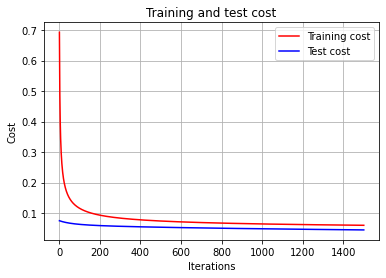

In [23]:
# Plots training and test cost history for the logistic regression
plt.figure(1)
plt.plot(np.linspace(1, itera, itera), train_cost, color='red', label='Training cost')
plt.plot(np.linspace(1, itera, itera), test_cost, color='blue', label='Test cost')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and test cost')
plt.legend()

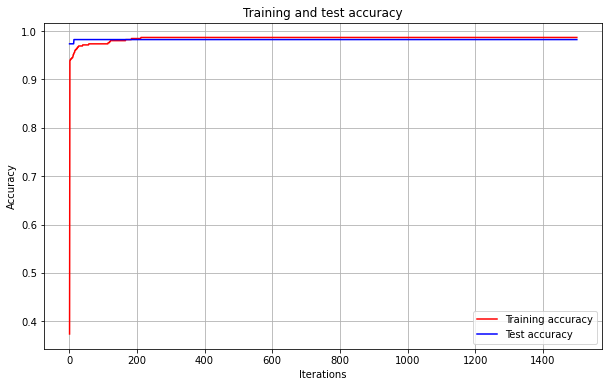

In [24]:
# Plots training and test accuracy history for the logistic regression
plt.figure(2)
plt.plot(np.linspace(1, itera, itera), train_acc, color='red', label='Training accuracy')
plt.plot(np.linspace(1, itera, itera), test_acc, color='blue', label='Test accuracy')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and test accuracy')
plt.legend()

In [25]:
# Problem 2

# Performs PCA on the data
pca = PCA()
pcs = pca.fit_transform(x)

# Performs 80% and 20% split of the labelled data into training and test sets
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(pcs, y, train_size=0.8, test_size=0.2, random_state=np.random)

In [26]:
# Initializes evaluation metrics for logistic regression model PCA
k = pcs.shape[1]
accuracy = np.zeros(k)
precision = np.zeros(k)
recall = np.zeros(k)

In [27]:

# Iteratively trains and evaluates model
acc = 0
k_opt = 0
for i in range(k):
    # Performing logistic regression
    lr = LogisticRegression()
    lr.fit(x_train_p[:, :i + 1], y_train_p)
    y_pred = lr.predict(x_test_p[:, :i + 1])

    # Evaluating model using accuracy, precision, and recall
    accuracy[i] = metrics.accuracy_score(y_test_p, y_pred)
    precision[i] = metrics.precision_score(y_test_p, y_pred)
    recall[i] = metrics.recall_score(y_test_p, y_pred)

    if accuracy[i] > acc:
        acc = accuracy[i]
        k_opt = i + 1

In [29]:
# Displays optimal K and corresponding accuracy, precision, and recall
print('Optimal value of K:', k_opt)
print('Accuracy:', acc)
print('Precision:', precision[k_opt - 1])
print('Recall:', recall[k_opt - 1])

Optimal value of K: 9
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9859154929577465


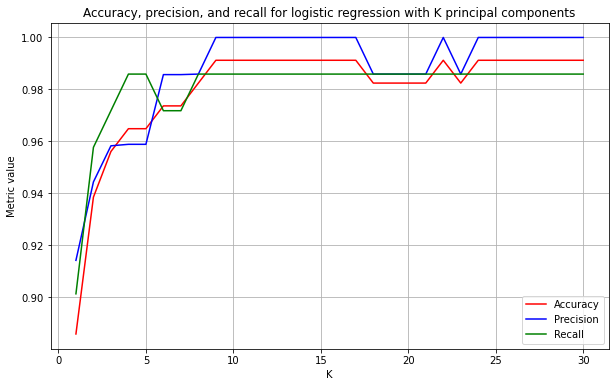

In [30]:
# Plots accuracy, precision, and recall for varying numbers of principal components
plt.figure(3)
plt.plot(np.linspace(1, k, k), accuracy, color='red',
         label='Accuracy')
plt.plot(np.linspace(1, k, k), precision, color='blue',
         label='Precision')
plt.plot(np.linspace(1, k, k), recall, color='green',
         label='Recall')
plt.rcParams['figure.figsize'] = (10, 6)
plt.grid()
plt.xlabel('K')
plt.ylabel('Metric value')
plt.title('Accuracy, precision, and recall for logistic regression with K principal'
          ' components')
plt.legend()

In [31]:
# Problem 3
# Performs LDA on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

In [32]:
# Evaluates naive Bayes model using accuracy, precision, and recall evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9230769230769231
Recall: 1.0


In [33]:
# Problem 4
# Transforms input data using linear discriminant function from LDA
lds = lda.fit_transform(x, y)

In [34]:

# Performs 80% and 20% split of the labelled data into training and test sets
x_train_l, x_test_l, y_train_l, y_test_l = train_test_split(lds, y, train_size=0.8, test_size=0.2, random_state=np.random)

In [35]:
# Performs logistic regression by instantiating LogisticRegression object
lr = LogisticRegression()
lr.fit(x_train_l, y_train_l)
y_pred = lr.predict(x_test_l)

In [36]:
# Evaluates model using accuracy, precision, and recall evaluation metrics
print('Accuracy:', metrics.accuracy_score(y_test_l, y_pred))
print('Precision:', metrics.precision_score(y_test_l, y_pred))
print('Recall:', metrics.recall_score(y_test_l, y_pred))
plt.show()

Accuracy: 0.9824561403508771
Precision: 0.9696969696969697
Recall: 1.0
